In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [21]:
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [23]:
df['original_title'].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [24]:
df.sort_values(by=['vote_average'])

budget                                             genres  \
4633       0                                                 []   
4305       0  [{"id": 35, "name": "Comedy"}, {"id": 10402, "...   
4653       0                      [{"id": 18, "name": "Drama"}]   
4293       1                                                 []   
4118       0                                                 []   
...      ...                                                ...   
3992       0                                                 []   
3519       0                     [{"id": 35, "name": "Comedy"}]   
4045       0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4247       1  [{"id": 10749, "name": "Romance"}, {"id": 35, ...   
4662       0                     [{"id": 35, "name": "Comedy"}]   

                          homepage      id  \
4633                           NaN  300327   
4305                           NaN  114065   
4653                           NaN   46252   
4293  http://thealgerianmovie.com/  357834   
4118                           NaN  325140   
...                            ...     ...   
3992                           NaN  346081   
3519                           NaN   89861   
4045                           NaN   78373   
4247                           NaN  361505   
4662                           NaN   40963   

                                               keywords original_language  \
4633                                                 []                en   
4305                                                 []                en   
4653                                                 []                en   
4293                                                 []                en   
4118                                                 []                en   
...                                                 ...               ...   
3992                                                 []                en   
3519  [{"id": 131, "name": "italy"}, {"id": 8250, "n...                en   
4045  [{"id": 1415, "name": "small town"}, {"id": 15...                en   
4247                                                 []                en   
4662        [{"id": 10183, "name": "independent film"}]                en   

                 original_title  \
4633                Death Calls   
4305  Down & Out With The Dolls   
4653                       Rust   
4293               The Algerian   
4118     Hum To Mohabbat Karega   
...                         ...   
3992                  Sardaarji   
3519           Stiff Upper Lips   
4045      Dancer, Texas Pop. 81   
4247      Me You and Five Bucks   
4662             Little Big Top   

                                               overview  popularity  \
4633  An action-packed love story on the Mexican bor...    0.005883   
4305  The raunchy, spunky tale of the rise and fall ...    0.002386   
4653  In the midst of a midlife crisis of faith, a m...    0.399491   
4293  The Algerian is an international political thr...    0.025364   
4118  Raju, a waiter, is in love with the famous TV ...    0.001186   
...                                                 ...         ...   
3992  A ghost hunter uses bottles to capture trouble...    0.296981   
3519  Stiff Upper Lips is a broad parody of British ...    0.356495   
4045  Four guys, best friends, have grown up togethe...    0.376662   
4247  A womanizing yet lovable loser, Charlie, a wai...    0.094105   
4662  An aging out of work clown returns to his smal...    0.092100   

                                   production_companies  \
4633                                                 []   
4305                                                 []   
4653                                                 []   
4293             [{"name": "Zelko Films", "id": 62451}]   
4118                                                 []   
...                                                 ...   
3992                                

In [25]:
vt=df.sort_values(by=['vote_average'])

In [26]:
vt.tail(5)

budget                                             genres homepage  \
3992       0                                                 []      NaN   
3519       0                     [{"id": 35, "name": "Comedy"}]      NaN   
4045       0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...      NaN   
4247       1  [{"id": 10749, "name": "Romance"}, {"id": 35, ...      NaN   
4662       0                     [{"id": 35, "name": "Comedy"}]      NaN   

          id                                           keywords  \
3992  346081                                                 []   
3519   89861  [{"id": 131, "name": "italy"}, {"id": 8250, "n...   
4045   78373  [{"id": 1415, "name": "small town"}, {"id": 15...   
4247  361505                                                 []   
4662   40963        [{"id": 10183, "name": "independent film"}]   

     original_language         original_title  \
3992                en              Sardaarji   
3519                en       Stiff Upper Lips   
4045                en  Dancer, Texas Pop. 81   
4247                en  Me You and Five Bucks   
4662                en         Little Big Top   

                                               overview  popularity  \
3992  A ghost hunter uses bottles to capture trouble...    0.296981   
3519  Stiff Upper Lips is a broad parody of British ...    0.356495   
4045  Four guys, best friends, have grown up togethe...    0.376662   
4247  A womanizing yet lovable loser, Charlie, a wai...    0.094105   
4662  An aging out of work clown returns to his smal...    0.092100   

                                   production_companies  \
3992                                                 []   
3519                                                 []   
4045  [{"name": "HSX Films", "id": 4714}, {"name": "...   
4247                                                 []   
4662          [{"name": "Fly High Films", "id": 24248}]   

                                   production_countries release_date  revenue  \
3992            [{"iso_3166_1": "IN", "name": "India"}]   2015-06-26        0   
3519  [{"iso_3166_1": "GB", "name": "United Kingdom"...   1998-06-12        0   
4045  [{"iso_3166_1": "US", "name": "United States o...   1998-05-01   565592   
4247                                                 []   2015-07-07        0   
4662  [{"iso_3166_1": "US", "name": "United States o...   2006-01-01        0   

      runtime                          spoken_languages    status  \
3992      0.0                                        []  Released   
3519     99.0  [{"iso_639_1": "en", "name": "English"}]  Released   
4045     97.0  [{"iso_639_1": "en", "name": "English"}]  Released   
4247     90.0                                        []  Released   
4662      0.0  [{"iso_639_1": "en", "name": "English"}]   Rumored   

                                           tagline                  title  \
3992                                           NaN              Sardaarji   
3519                                           NaN       Stiff Upper Lips   
4045  in the middle of nowhere they had everything  Dancer, Texas Pop. 81   
4247          A story about second, second chances  Me You and Five Bucks   
4662                                           NaN         Little Big Top   

      vote_average  vote_count  
3992           9.5           2  
3519          10.0           1  
4045          10.0           1  
4247          10.0           2  
4662          10.0           1

In [27]:
filtre=df['production_countries'].str.contains("TR")
df[filtre]

budget                                             genres homepage  \
3231  10000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...      NaN   

         id                                           keywords  \
3231  11818  [{"id": 2051, "name": "intelligence"}, {"id": ...   

     original_language         original_title  \
3231                tr  Kurtlar vadisi - Irak   

                                               overview  popularity  \
3231  The movie opens with a fictionalized depiction...    1.465762   

                      production_companies  \
3231  [{"name": "Pana Film", "id": 58135}]   

                          production_countries release_date  revenue  runtime  \
3231  [{"iso_3166_1": "TR", "name": "Turkey"}]   2006-02-03        0    122.0   

                                       spoken_languages    status  \
3231  [{"iso_639_1": "ar", "name": "\u0627\u0644\u06...  Released   

                             tagline                       title  \
3231  Some Men Are Born to be Heroes  Valley of the Wolves: Iraq   

      vote_average  vote_count  
3231           4.3           7

In [28]:
filtre2=df['production_countries'].str.contains("US")
df[filtre2]

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4796                         http://www.primermovie.com   14337   
4798                                                NaN    9367   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4796  [{"id": 1448, "name": "distrust"}, {"id": 2101...                en   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4796                                    Primer   
4798                               El Mariachi   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4796  Friends/fledgling entrepreneurs invent a devic...   23.307949   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [29]:
us=df[filtre2]

In [30]:
us['vote_average'].mean()

6.113498483316481

<Axes: >

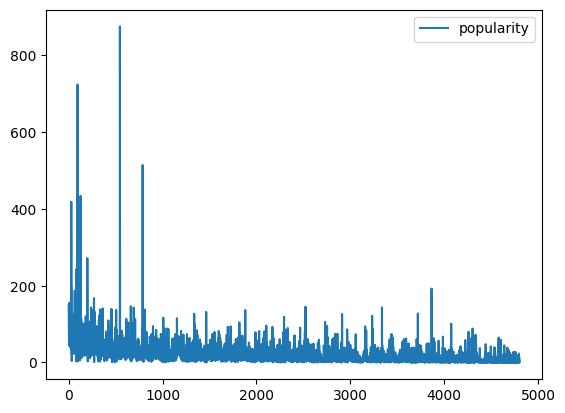

In [31]:
df[['popularity']].plot()

In [32]:
df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [33]:
tl=df.groupby(by=['original_title']).mean(numeric_only=True)

In [34]:
tl.loc[["Avatar","Sherlock Holmes","Star Wars"]]

budget       id  popularity       revenue  runtime  \
original_title                                                             
Avatar           237000000.0  19995.0  150.437577  2.787965e+09    162.0   
Sherlock Holmes   90000000.0  10528.0   57.834787  5.240287e+08    128.0   
Star Wars         11000000.0     11.0  126.393695  7.753980e+08    121.0   

                 vote_average  vote_count  
original_title                             
Avatar                    7.2     11800.0  
Sherlock Holmes           7.0      5766.0  
Star Wars                 8.1      6624.0

In [35]:
tl.style.background_gradient(cmap="CMRmap_r")